## Exercise 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data

#### 2. Subsetting, wrangling, and cleaning time-series data

#### 3. Time series analysis: decomposition

#### 4. Testing for stationarity
     a. Dickey-Fuller Test
     b. Checking autocorrelation

#### 5. Stationarizing the data

#### 6. Bonus - Forecasting the data
     a. Defining Your Parameters
     b. Splitting the Data
     c. Running and Fitting the Model
     d. Iterating

#### 1. Importing your libraries and data

In [1]:
# import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# creating path folder 
path = r'C:\Users\cpaul\Documents\Career Foundry\Causes of deaths other than diseases'

# Import dataset, causes_of_deaths_merged.csv to create df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'causes_of_deaths_geo_cleaned_for_regression.csv'), index_col = False)

#### 2. Subsetting, wrangling, and cleaning time-series data

In [3]:
df.shape

(10610, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'country_code', 'country', 'year', 'deaths', 'cause',
       'total_population', 'gdp_value', 'income_group', 'region', 'sub_region',
       'death_percentage', 'gdp_per_capita', 'income_group_id'],
      dtype='object')

In [5]:
df = df.drop(columns =['Unnamed: 0'])

In [6]:
# Create subset of 'deaths', 'total_population', 'gdp_value', 'death_percentage', 'gdp_per_capita' for each year

df_subset_by_year = df.groupby('year', as_index=False)[['deaths', 'total_population', 'gdp_value', 'death_percentage', 'gdp_per_capita']].mean()

In [7]:
df_subset_by_year.head()

,year,deaths,total_population,gdp_value,death_percentage,gdp_per_capita
0,2007,99.937500,3.509937e+07,3.023016e+11,2.504257e-08,11679.343152
1,2008,326.659375,3.552707e+07,3.323270e+11,8.185506e-08,12925.377193
2,2009,106.563542,3.595479e+07,3.151121e+11,2.670294e-08,11405.992759
3,2010,405.514583,3.638069e+07,3.446411e+11,1.016148e-07,12129.335839
4,2011,182.928497,3.666042e+07,3.803556e+11,4.583864e-08,13352.163124


In [8]:
# create a subset to model the death percentage 
df_subset = df_subset_by_year[['year','deaths']]

In [9]:
df_subset.shape

(11, 2)

In [10]:
df_subset.head(11)

,year,deaths
0,2007,99.937500
1,2008,326.659375
2,2009,106.563542
3,2010,405.514583
4,2011,182.928497
5,2012,159.686010
6,2013,172.229016
7,2014,244.154404
8,2015,204.874227
9,2016,191.241237


In [11]:
# Set the "year" column as the index

from datetime import date

df_subset['datetime'] = pd.to_datetime(df_subset['year'], format='%Y') # Create a datetime column from "year."
df_subset = df_subset.set_index('datetime') # Set the datetime as the index of the dataframe.
df_subset.drop(['year'], axis=1, inplace=True) # Drop the "year" column.
df_subset.head()

,deaths
datetime,
2007-01-01,99.937500
2008-01-01,326.659375
2009-01-01,106.563542
2010-01-01,405.514583
2011-01-01,182.928497


In [12]:
# Check for missing values (you shouldn't have any)

df_subset.isnull().sum() 

deaths    0
dtype: int64

In [13]:
# Check for duplicates

dups = df_subset.duplicated()
dups.sum()

0

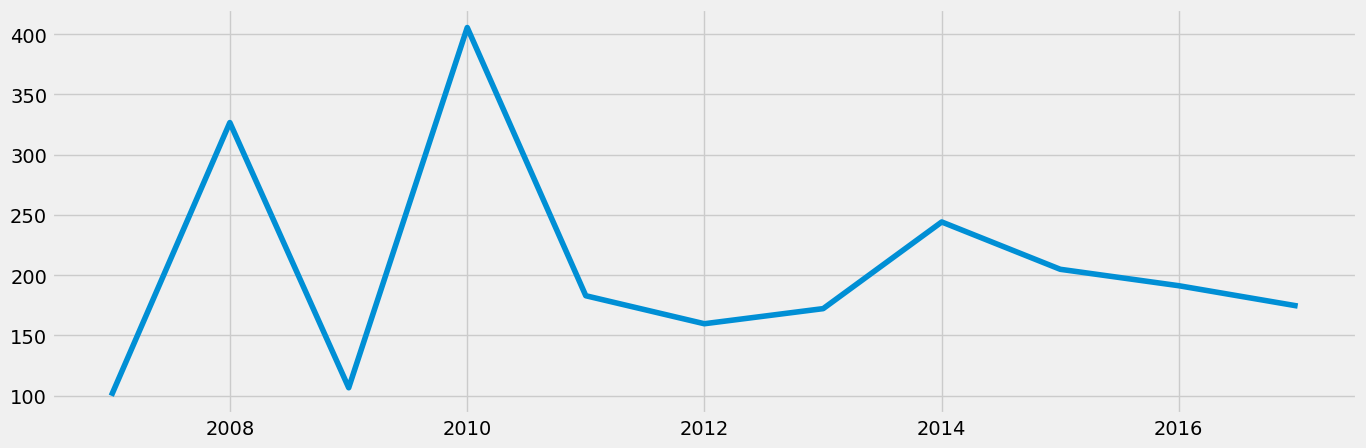

In [14]:
# Create a line chart of the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_subset)

#### 3. Time-series analysis: decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_subset, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

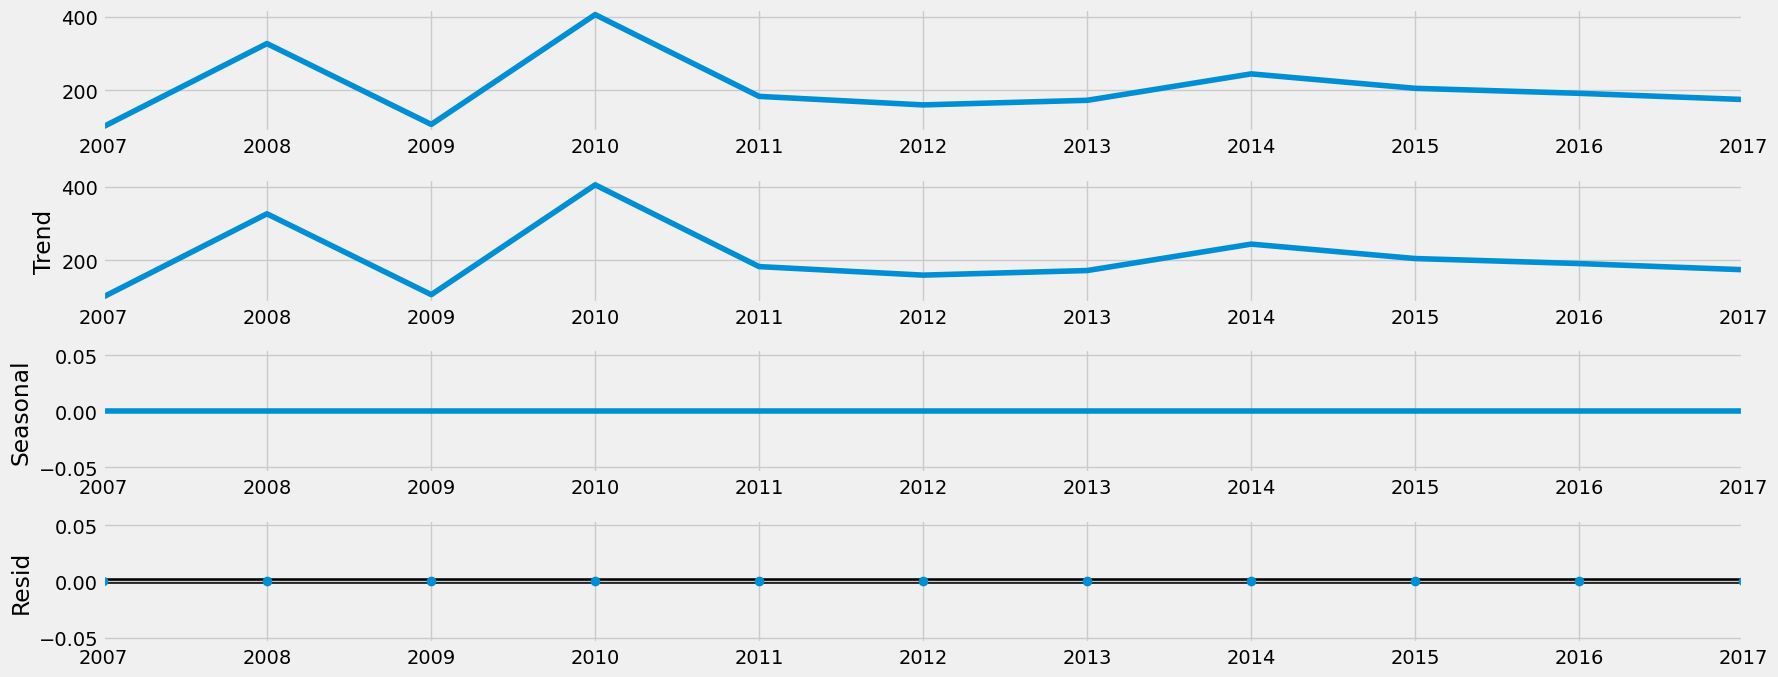

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

In [18]:
# Decompose the time series using a multiplicative model

decomposition_m = sm.tsa.seasonal_decompose(df_subset, model='multiplicative')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

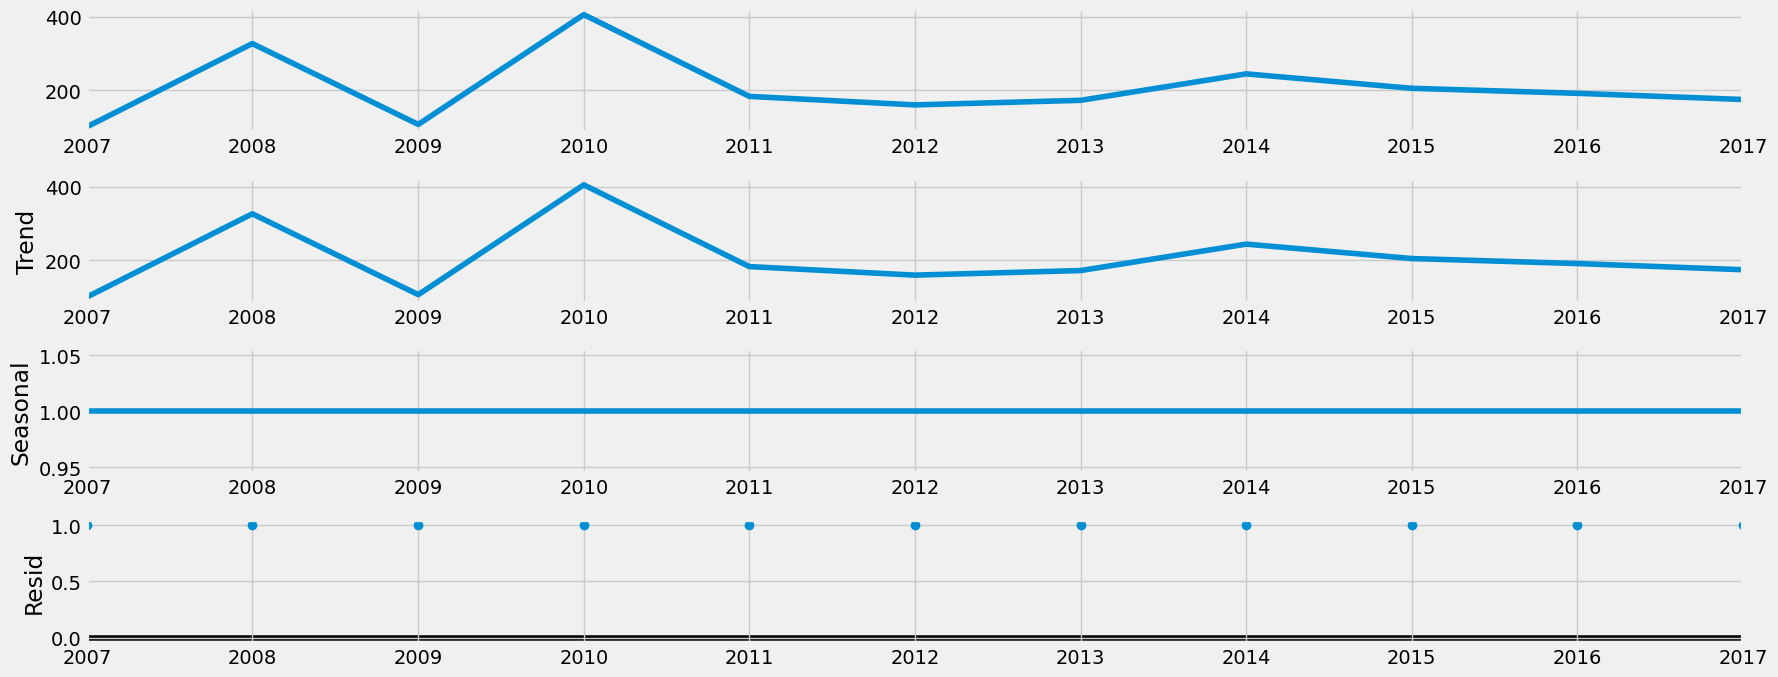

In [20]:
# Plot the separate components

decomposition_m.plot()
plt.show()

#### 4. Testing for stationarity:

#### 4a. Dickey-Fuller Test

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_subset['deaths'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.346675e+00
p-value                        2.672382e-08
Number of Lags Used            3.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64


#### Observations:

Test statistic, -6.346675e+00 < critical value (5%), -3.477583e+00, the values are the same as the values for death_percentage.

The null hypothesis is rejected meaning that there is no unit root in the data.

The data is stationary.

I could proceed with the forecast, but I would like to check the autocorrelation first to make sure.

#### 4b. Checking Autocorrelation

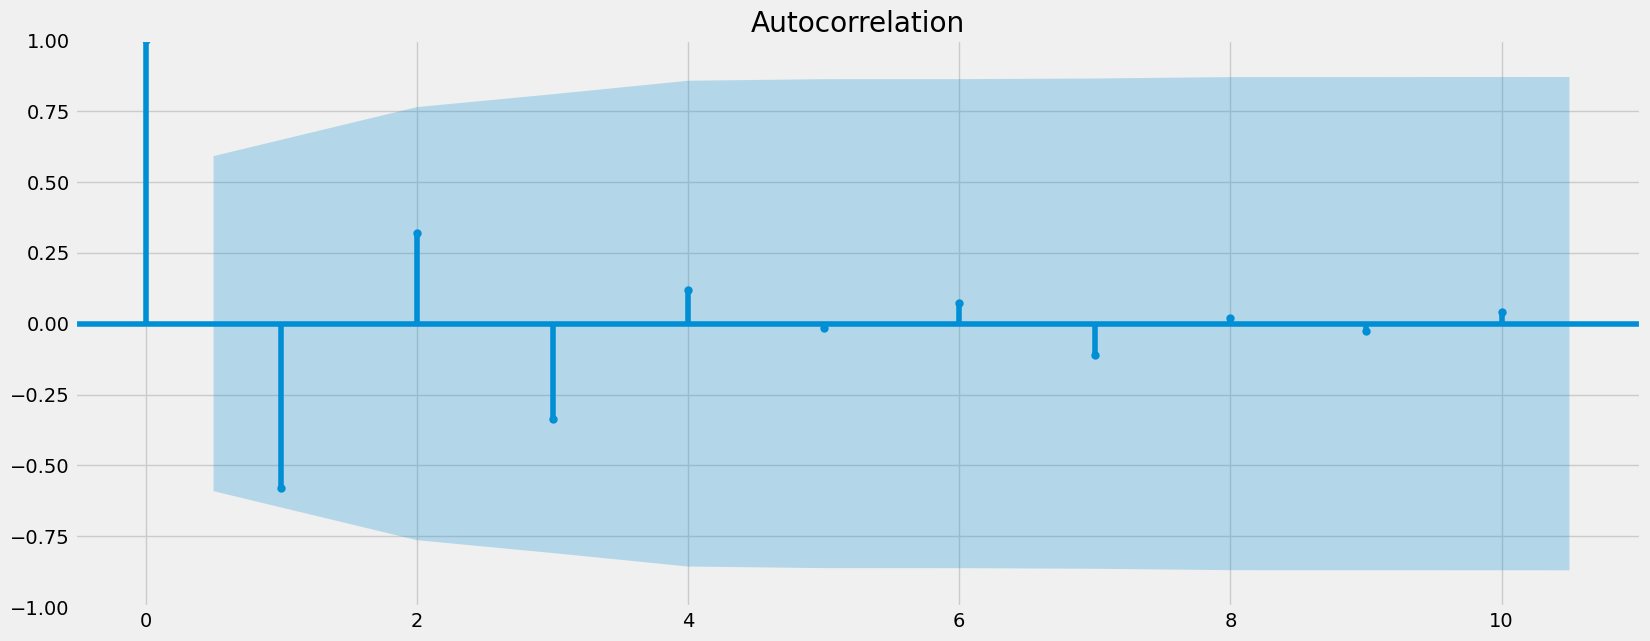

In [22]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_subset)
plt.show()

##### Observations:
This plot of autocorrelations shows that the data is indeed stationary and supports the results from the Dickey-Fuller test. There is only one lag beyond the blue edge of the confidence interval leading me to feel that the stationarity is strong. This is further supported by the p-value from the Dickey-Fuller test (2.672382e-08) which is much less than the satisfactory p-value (p<0.05).

#### 5. Stationarizing the data

Skipping this step since the data is already stationary and I can forecast the data. 

In [70]:
# Exporting the subset of the dataset grouped by year.
df_subset_by_year.to_csv(os.path.join(path, 'Data','Prepared Data', 'causes_of_deaths_timeseries.csv'))

#### 6. Bonus - Forecasting the data

#### a. Defining Your Parameters

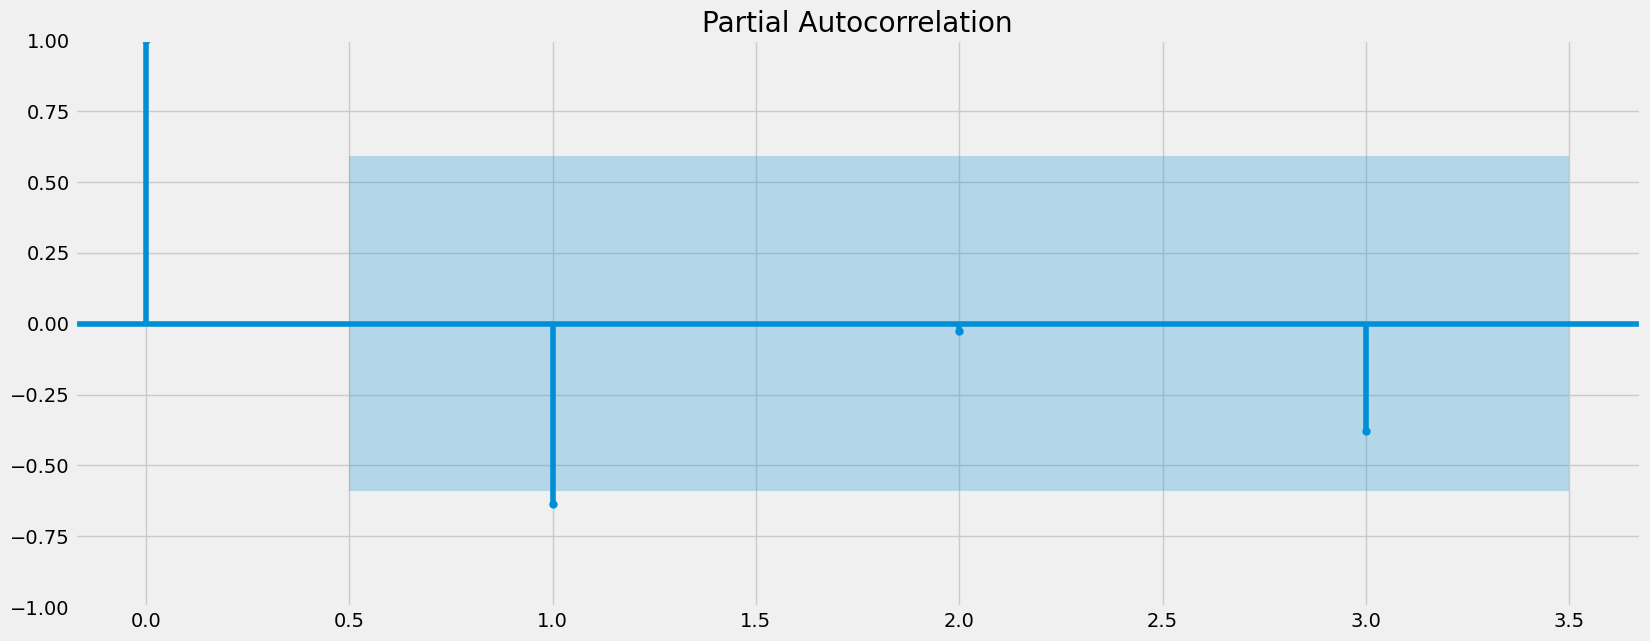

<Figure size 4500x4500 with 0 Axes>

In [23]:
### Plot partial autocorrelations to determine parameter p

plot_pacf(df_subset, lags=3)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

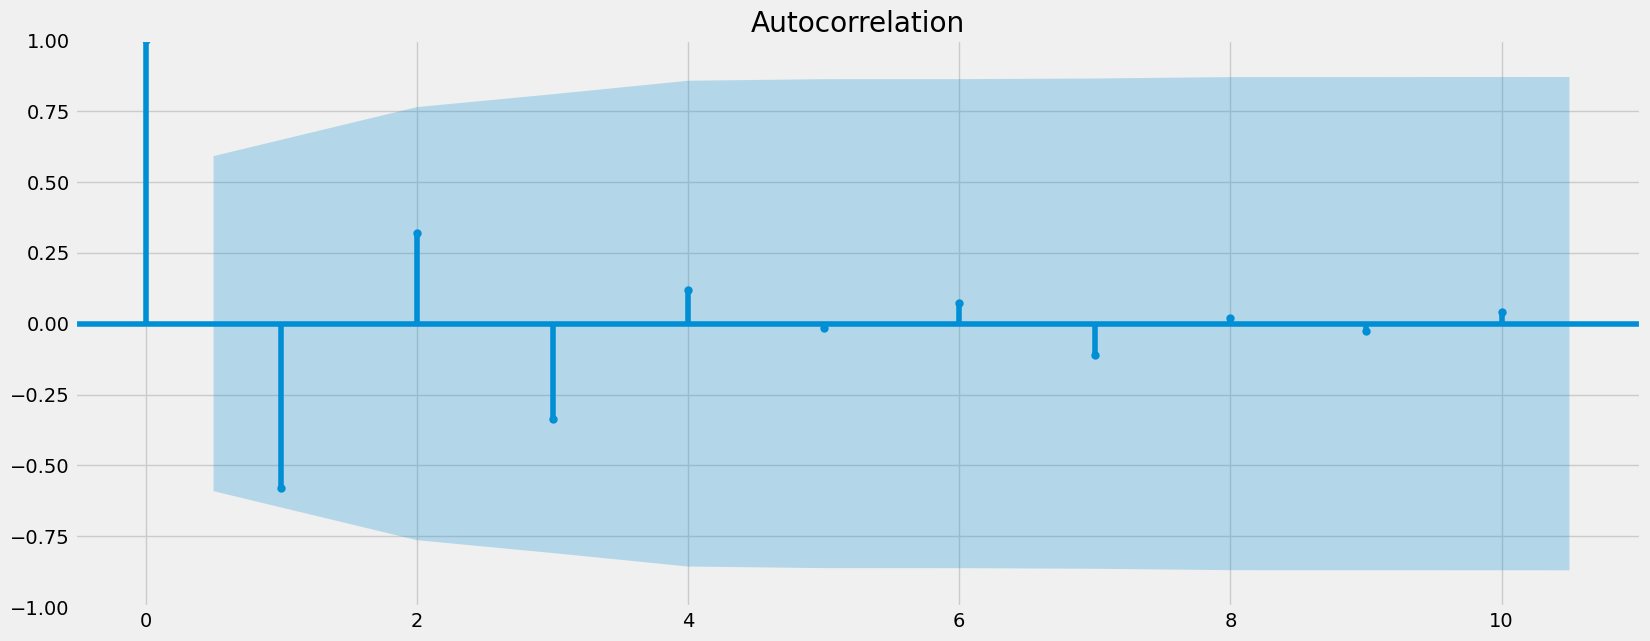

<Figure size 1500x500 with 0 Axes>

In [24]:
# Plot autocorrelations to determine parameter q

plot_acf(df_subset)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

#### b. Splitting the data

In [25]:
# Split the data

train = df_subset['deaths'][:7]
test = df_subset['deaths'][6:]

In [26]:
train.head(10)

datetime
2007-01-01     99.937500
2008-01-01    326.659375
2009-01-01    106.563542
2010-01-01    405.514583
2011-01-01    182.928497
2012-01-01    159.686010
2013-01-01    172.229016
Name: deaths, dtype: float64

In [27]:
test.head(10)

datetime
2013-01-01    172.229016
2014-01-01    244.154404
2015-01-01    204.874227
2016-01-01    191.241237
2017-01-01    174.382474
Name: deaths, dtype: float64

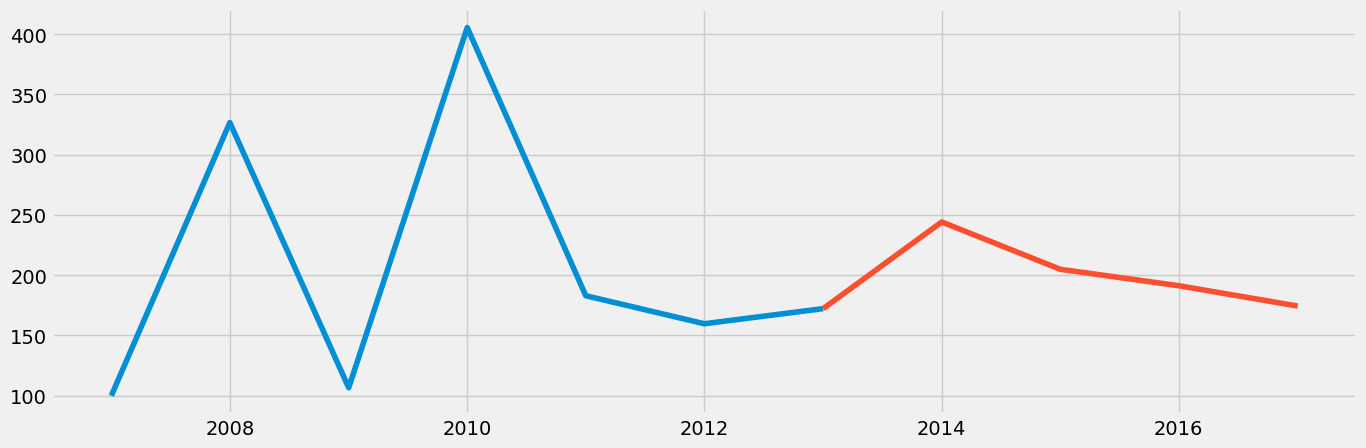

In [28]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

#### c. Running and fitting the model

In [29]:
from statsmodels.tsa.api import ARIMA # Import the model you need

In [32]:
# p=2, q=2, d=0(since we did not do differencing to make the dataset stationary)
# I'm basically running the ARMA model since there was no differencing done, d=0

model = ARIMA(train, order=(1, 0, 1))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% confidence interval  --> alpha = 0.05; 5 is the shape of the test set

#print(fc)
#print(se)
print(conf)


# Make into pandas series
fc_series = pd.Series(fc, index=test.index) # This creates the forecasted curve

#print(type(conf))
#print(conf.shape)


# lower_series = pd.Series(conf[:, 0], index=test.index) # lower bound of the confidence interval
# upper_series = pd.Series(conf[:, 1], index=test.index) # Upper bound of the confidence interval

# Plot
# plt.figure(figsize=(12,4), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.05) # This creates the confidence interval
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

                               SARIMAX Results                                
Dep. Variable:                 deaths   No. Observations:                    7
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -40.895
Date:                Mon, 16 Oct 2023   AIC                             89.790
Time:                        19:32:16   BIC                             89.574
Sample:                    01-01-2007   HQIC                            87.116
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        215.6593     26.205      8.230      0.000     164.299     267.020
ar.L1         -0.7376      0.375     -1.969      0.049      -1.472      -0.003
ma.L1          0.1872      0.642      0.292      0.7